In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Identify Frauds with SOMs

In [2]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone,pcolor,colorbar,plot,show

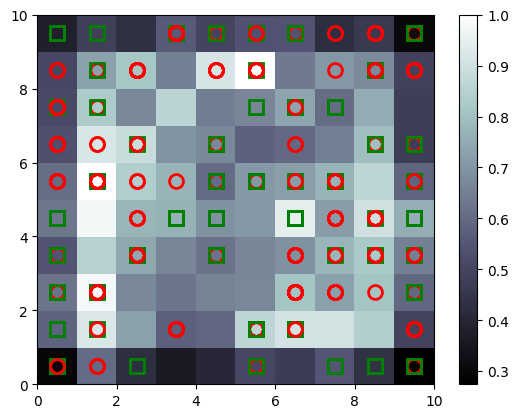

In [6]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

# Training the SOM
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

# Initialize Weights
som.random_weights_init(X)

som.train_random(X,num_iteration=100)

# Visualizing results
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[int(y[i])],
         markeredgecolor = colors[int(y[i])],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [10]:
mappings = som.win_map(X)
frauds = np.concatenate([mappings[(5,8)],mappings[(1,5)],mappings[(1,2)]]) 
frauds = sc.inverse_transform(frauds)

In [11]:
frauds.shape

(42, 15)

## Part 2 - Going from Unsupervised to Supervised Deep Learning

In [15]:
# Creating a matrix of features
customers = dataset.iloc[:,1:].values

In [16]:
customers.shape

(690, 15)

In [17]:
len(dataset)

690

In [20]:
# Creating dependent variable
is_fraud = np.zeros(len(dataset))

In [22]:
is_fraud.shape

(690,)

In [23]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [24]:
is_fraud

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
import tensorflow as tf

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
stdsc = StandardScaler()

In [28]:
customers = stdsc.fit_transform(customers)

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(customers,is_fraud,batch_size=1,epochs=5)

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.6355 - accuracy: 0.7551
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.3870 - accuracy: 0.9159
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.3055 - accuracy: 0.9362
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2598 - accuracy: 0.9377
Epoch 5/5
690/690 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9391


In [40]:
y_pred = model.predict(customers)

22/22 [==============================] - 0s 1ms/step


In [41]:
y_pred

array([[0.21200578],
       [0.09206789],
       [0.09081003],
       [0.09180269],
       [0.21200578],
       [0.00906758],
       [0.21200578],
       [0.00131115],
       [0.12379254],
       [0.00410006],
       [0.02474394],
       [0.0295295 ],
       [0.03833437],
       [0.05389492],
       [0.05642851],
       [0.09641708],
       [0.11258171],
       [0.03356194],
       [0.23295057],
       [0.04562042],
       [0.05024715],
       [0.0307685 ],
       [0.16470134],
       [0.02574898],
       [0.21200578],
       [0.02796846],
       [0.19512297],
       [0.00301156],
       [0.01378364],
       [0.21200578],
       [0.04161561],
       [0.04862211],
       [0.01446263],
       [0.21200578],
       [0.21200578],
       [0.05711265],
       [0.06411614],
       [0.21200578],
       [0.0194128 ],
       [0.00596745],
       [0.03869707],
       [0.29674956],
       [0.00965343],
       [0.01112498],
       [0.17029534],
       [0.02876991],
       [0.0396983 ],
       [0.212

In [42]:
y_pred =np.concatenate((dataset.iloc[:,0:1],y_pred),axis=1)

In [43]:
y_pred.shape

(690, 2)

In [45]:
y_pred[0]

array([1.57761560e+07, 2.12005779e-01])

In [46]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [48]:
y_pred[0][1]

0.0007298364071175456

In [49]:
y_pred[689][1]

0.46535906195640564